# Imports

In [1]:
from pycaret.classification import * 
from pycaret.datasets import get_data

import pandas as pd

# Loading data

In [2]:
#Load dataset
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test  = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
#Target
target = list(set(train.columns) - set(test.columns))
target = target[0]

In [4]:
#Drop Id column
X_test_id = test["Id"]

train.drop(columns='Id',inplace=True)
test.drop(columns='Id',inplace=True)

# Initialize Setup

In [5]:
from pycaret.regression import *
reg1 = setup(train, target = target, session_id=123, log_experiment=True, experiment_name='house_prices')

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 80)"
3,Missing Values,True
4,Numeric Features,18
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 405)"


# Compare Baseline

In [6]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,18309.8717,987492338.1366,30818.8323,0.8544,0.1458,0.1062,0.3800
lightgbm,Light Gradient Boosting Machine,19001.9095,1036559871.6411,31604.8697,0.8466,0.1551,0.1115,0.1280
rf,Random Forest Regressor,19597.3330,1162996434.3143,33627.2592,0.8266,0.1639,0.1163,1.0360
ada,AdaBoost Regressor,25954.7154,1461992129.7201,37764.7026,0.7809,0.2085,0.1681,0.2760
et,Extra Trees Regressor,23200.7288,1541078098.0116,38822.3996,0.7679,0.1894,0.1356,1.0140
ridge,Ridge Regression,20653.4516,1556384742.4000,38630.8355,0.7568,0.2040,0.1236,0.0980
omp,Orthogonal Matching Pursuit,19132.8941,1526980903.4229,38275.4888,0.7536,0.1736,0.1150,0.5960
en,Elastic Net,22077.4422,1753104972.8000,40355.3844,0.7334,0.1763,0.1299,0.1600
lasso,Lasso Regression,21772.6309,1889340352.0000,42444.5203,0.6947,0.2296,0.1346,1.1980
br,Bayesian Ridge,25957.0009,2139649242.9974,44998.8740,0.6719,0.2123,0.1535,0.1440


In [7]:
best_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Create Model

In [8]:
model = create_model(best_model)
model_lgbm = create_model('lightgbm')
model_rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,23612.4757,2366430315.4710,48645.9692,0.7110,0.2070,0.1409
1,19131.2802,965873067.6528,31078.4985,0.8493,0.1417,0.1007
2,15639.0714,460397221.2097,21456.8689,0.9003,0.1378,0.1056
3,18959.9124,881257524.6200,29685.9820,0.8301,0.1608,0.1161
4,23157.6022,1828662011.1532,42762.8578,0.8140,0.2016,0.1475
5,17588.4612,1095182544.9704,33093.5423,0.8483,0.1533,0.1052
6,17172.5530,621404882.4678,24927.9940,0.8682,0.1261,0.0968
7,20994.5319,1019072604.6412,31922.9166,0.8505,0.1767,0.1287
8,21909.4059,1265255383.1755,35570.4285,0.8112,0.1763,0.1283
9,16713.7176,700014468.4379,26457.7865,0.8732,0.1160,0.0855


# Tune Hyperparameters

In [9]:
tuned_best_model = tune_model(best_model, n_iter=20, optimize = 'MAE')
tuned_best_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,21038.4201,2569221058.1376,50687.4842,0.6862,0.2029,0.1303
1,17813.7929,798126936.6427,28251.1404,0.8754,0.1325,0.0969
2,14767.4912,412608597.3826,20312.7693,0.9107,0.1322,0.0972
3,16899.4394,640624808.9488,25310.5671,0.8765,0.1359,0.1029
4,20117.0148,1501044240.3412,38743.3122,0.8473,0.1699,0.1208
5,17873.5415,940633538.1259,30669.7496,0.8697,0.1468,0.1040
6,16443.3248,576936832.5515,24019.5094,0.8776,0.1214,0.0909
7,18050.5064,668359982.7502,25852.6591,0.9019,0.1389,0.1053
8,19155.1151,989189233.6584,31451.3789,0.8524,0.1497,0.1093
9,14902.2487,542438778.3425,23290.3151,0.9017,0.1039,0.0784


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.2, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=280,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
tuned_model_lgbm = tune_model(model_lgbm, n_iter=20, optimize = 'MAE')
tuned_model_lgbm

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22071.3897,1716299709.9546,41428.2477,0.7904,0.1910,0.1284
1,18615.3521,735797179.3063,27125.5816,0.8852,0.1444,0.1052
2,15089.2686,454350875.3921,21315.5079,0.9016,0.1286,0.0945
3,16724.5325,674584089.5030,25972.7567,0.8700,0.1413,0.1042
4,20810.1121,1293727358.1037,35968.4217,0.8684,0.1893,0.1349
5,19978.5680,1334518928.0566,36531.0680,0.8151,0.1614,0.1153
6,17155.5696,600873534.5685,24512.7219,0.8725,0.1247,0.0975
7,20448.7385,906460003.1489,30107.4742,0.8670,0.1658,0.1230
8,20493.6618,1126891478.4675,33569.2043,0.8318,0.1560,0.1158
9,16267.6523,553229446.4331,23520.8301,0.8998,0.1253,0.0913


LGBMRegressor(bagging_fraction=1.0, bagging_freq=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=46, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=280, n_jobs=-1, num_leaves=100, objective=None,
              random_state=123, reg_alpha=4, reg_lambda=3, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [11]:
tuned_model_rf = tune_model(model_rf, n_iter=20, optimize = 'MAE')
tuned_model_rf

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22513.9284,2029951482.0001,45054.9829,0.7521,0.2064,0.1393
1,20458.1910,998028455.0424,31591.5884,0.8443,0.1488,0.1081
2,15655.2884,465238576.4222,21569.3898,0.8993,0.1396,0.1060
3,19902.7315,949975825.9736,30821.6779,0.8169,0.1673,0.1209
4,24211.1010,2208475219.6574,46994.4169,0.7753,0.2089,0.1505
5,18907.1177,1304097154.8268,36112.2854,0.8193,0.1626,0.1124
6,17954.2871,644150032.0643,25380.1110,0.8634,0.1320,0.1030
7,21895.8905,1077450213.3491,32824.5368,0.8419,0.1832,0.1348
8,22273.8998,1224026316.5171,34986.0875,0.8173,0.1779,0.1318
9,17146.9058,703296911.3347,26519.7457,0.8726,0.1198,0.0898


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

# Interpret Model

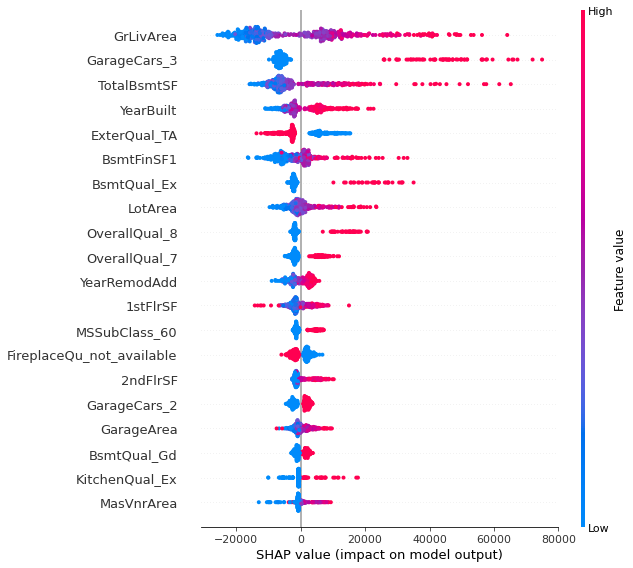

In [25]:
interpret_model(model_lgbm)

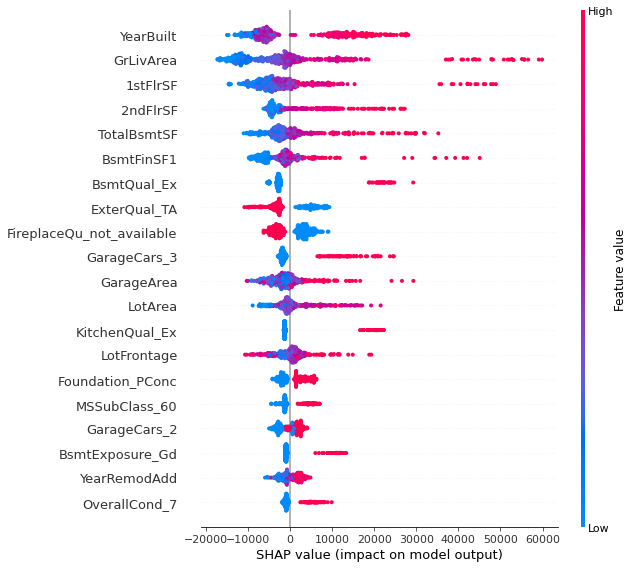

In [26]:
interpret_model(tuned_model_lgbm)

In [12]:
pred_holdouts = predict_model(best_model)
pred_holdouts = predict_model(tuned_best_model)

pred_holdouts = predict_model(model_lgbm)
pred_holdouts = predict_model(tuned_model_lgbm)

pred_holdouts = predict_model(model_rf)
pred_holdouts = predict_model(tuned_model_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,16511.3747,739311203.7289,27190.2777,0.8709,0.1270,0.0918


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15276.2822,635430887.6396,25207.7545,0.8891,0.1186,0.0840


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,17158.9373,761710245.1583,27599.0986,0.8670,0.1309,0.0945


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,17935.4070,860274850.8752,29330.4424,0.8498,0.1380,0.0993


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,16827.7696,776258173.9042,27861.4101,0.8645,0.1368,0.0960


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,17455.0576,868794766.7620,29475.3247,0.8483,0.1416,0.0996


In [13]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best, data=test)
predict_new.head()

NameError: name 'data' is not defined